In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import numpy as np

In [67]:
rice = pd.read_excel(r"C:\Users\ashfa\Desktop\rice final\rice new one.xlsx")
rice

,Year_New,Season,Sown (*000 Acres),Harvested (*000 Acres),GDP B$,Inflation(%),Rainfall(mm),Temperature(°C),Production (*000 Mt.)
0,1950,Yala,389.000,362.000,0.869,6.95,768,29.32,167
1,1950,Maha,710.000,678.000,0.857,2.27,1540,26.17,359
2,1951,Yala,402.000,386.000,0.692,3.85,749,28.43,176
3,1951,Maha,738.000,700.000,0.820,2.92,1347,27.49,385
4,1952,Yala,424.000,402.000,1.176,8.39,533,29.38,219
...,...,...,...,...,...,...,...,...,...
144,2022,Yala,1190.226,1186.806,74.140,49.72,410,29.15,1462
145,2022,Maha,2007.977,1996.280,79.250,33.13,1800,26.73,2696
146,2023,Yala,1248.067,1214.950,84.360,16.54,530,30.15,1817
147,2023,Maha,1993.329,1939.880,86.690,9.12,2270,26.61,2709


In [68]:
rice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_New                 149 non-null    int64  
 1   Season                   149 non-null    object 
 2   Sown (*000  Acres)       149 non-null    float64
 3   Harvested (*000  Acres)  149 non-null    float64
 4   GDP B$                   149 non-null    float64
 5   Inflation(%)             149 non-null    float64
 6   Rainfall(mm)             149 non-null    int64  
 7   Temperature(°C)          149 non-null    float64
 8   Production (*000  Mt.)   149 non-null    int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 10.6+ KB


In [69]:
rice.isnull().sum()

Year_New                   0
Season                     0
Sown (*000  Acres)         0
Harvested (*000  Acres)    0
GDP B$                     0
Inflation(%)               0
Rainfall(mm)               0
Temperature(°C)            0
Production (*000  Mt.)     0
dtype: int64

In [70]:
#Summary of the dataset
rice.describe()

,Year_New,Sown (*000 Acres),Harvested (*000 Acres),GDP B$,Inflation(%),Rainfall(mm),Temperature(°C),Production (*000 Mt.)
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,1986.751678,1025.882329,971.636940,32.397356,8.325168,1093.530201,27.061342,1171.167785
std,21.579804,404.363853,392.128673,119.727984,6.711841,633.111755,1.286175,732.832651
min,1950.000000,354.000000,328.000000,0.489000,-1.540000,385.000000,24.480000,167.000000
25%,1968.000000,684.000000,661.000000,1.970000,3.870000,477.000000,26.320000,534.000000
50%,1987.000000,948.000000,888.000000,6.830000,7.010000,894.000000,26.760000,1049.000000
75%,2005.000000,1329.000000,1250.000000,28.280000,11.380000,1730.000000,27.350000,1671.000000
max,2024.000000,2007.977000,1996.280000,1435.000000,49.720000,2470.000000,31.080000,3197.000000


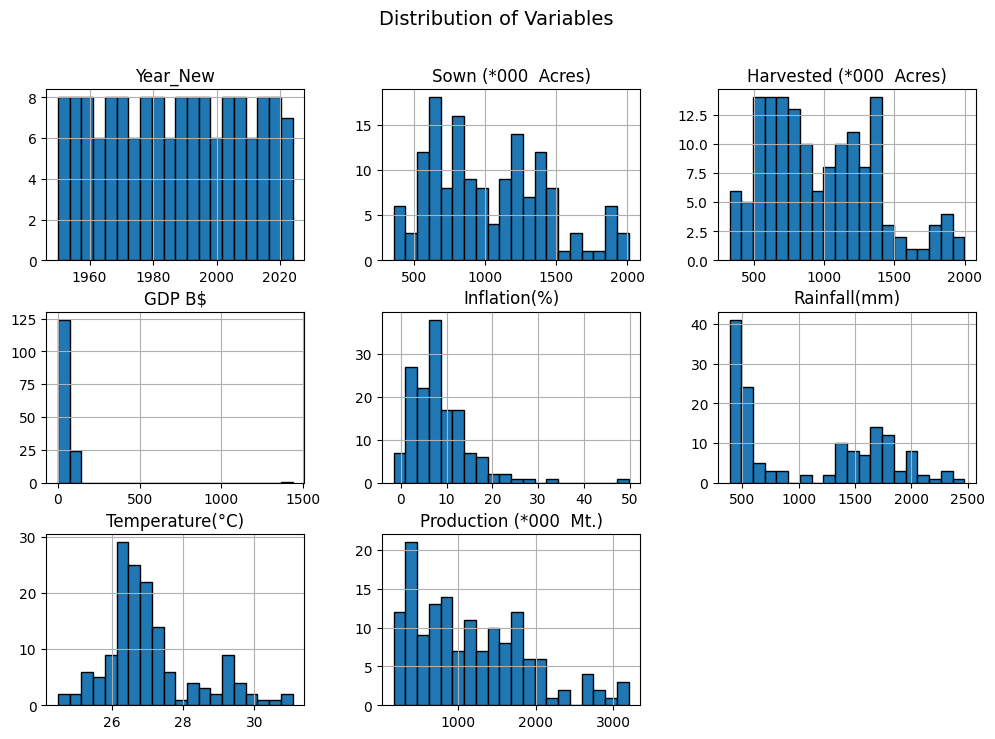

In [71]:
#Plot distributions of numerical veriables
rice.hist(bins=20, figsize=(12, 8), edgecolor='black')
plt.suptitle('Distribution of Variables', fontsize=14)
plt.show()

In [72]:
#Normality test for numerical columns
normality_p_values={}
for col in rice.select_dtypes(include=['float64', 'int64']).columns:
    stat, p_value=shapiro(rice[col])
    normality_p_values[col]=p_value
    print(f'{col}: p-value={p_value:.4f}')

Year_New: p-value=0.0001
Sown (*000  Acres): p-value=0.0001
Harvested (*000  Acres): p-value=0.0001
GDP B$: p-value=0.0000
Inflation(%): p-value=0.0000
Rainfall(mm): p-value=0.0000
Temperature(°C): p-value=0.0000
Production (*000  Mt.): p-value=0.0000


In [73]:
#Choosing the best correlation method
correlation_method= 'Spearman' if any(p < 0.05 for p in normality_p_values.values()) else 'Pearson'
print(f'\nUsing {correlation_method} correlation based on normality test.')


Using Spearman correlation based on normality test.


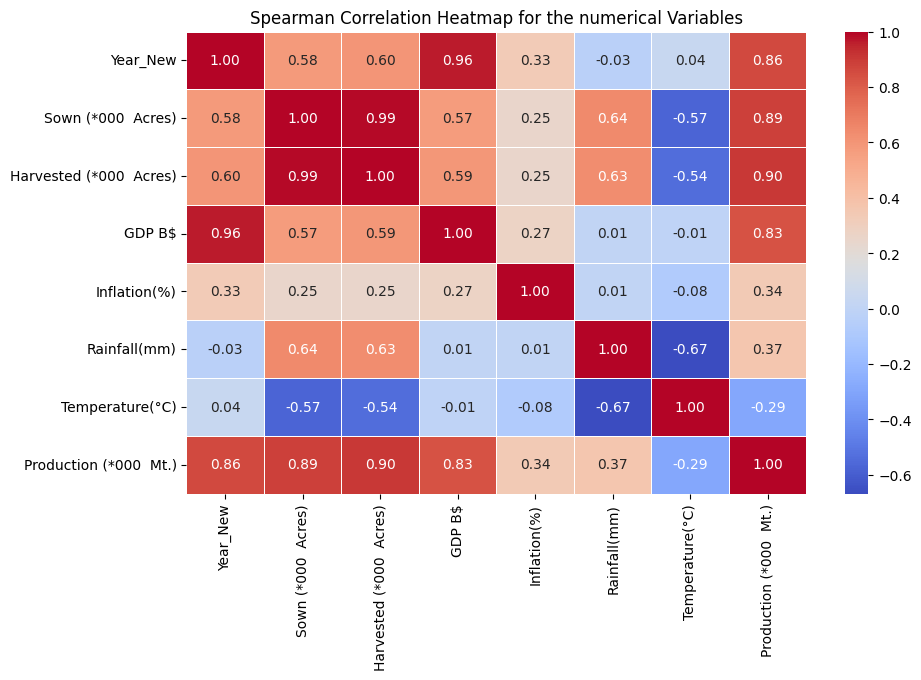

In [74]:
#Compute correlation matrix
df=rice.select_dtypes(include=['number'])

correlation_matrix=df.corr(method=correlation_method.lower())

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title(f'{correlation_method} Correlation Heatmap for the numerical Variables')
plt.show()

In [75]:
# Set correlation threshold values
strong_threshold=0.7 # Strong correlation (positve or negative)  
weak_threshold=0.2 # Weak correlation (near zero)

# Compute the correlation matrix
corr_matrix=df.corr(method=correlation_method.lower())

# Choose the target variable
target_variable= 'Production (*000  Mt.)'

# Extract the correlations with the target variable
corr_with_target=corr_matrix[target_variable].drop(target_variable)

# Identify strongly correlated features
strong_corr=corr_with_target[abs(corr_with_target) >= strong_threshold]

# Identify strongly correlated features
weak_corr=corr_with_target[abs(corr_with_target) < weak_threshold]


# Display results
print("\n🔹 Strongly Correlated Features (|r| ≥ 0.7):")
print(strong_corr.sort_values(ascending=False))

print("\n🔹 Weakly Correlated Features (|r| < 0.2):")
print(weak_corr.sort_values(ascending=False))


🔹 Strongly Correlated Features (|r| ≥ 0.7):
Harvested (*000  Acres)    0.904482
Sown (*000  Acres)         0.887281
Year_New                   0.858844
GDP B$                     0.834953
Name: Production (*000  Mt.), dtype: float64

🔹 Weakly Correlated Features (|r| < 0.2):
Series([], Name: Production (*000  Mt.), dtype: float64)


## Time Series

### Seasonal Plot (Yala + Maha)

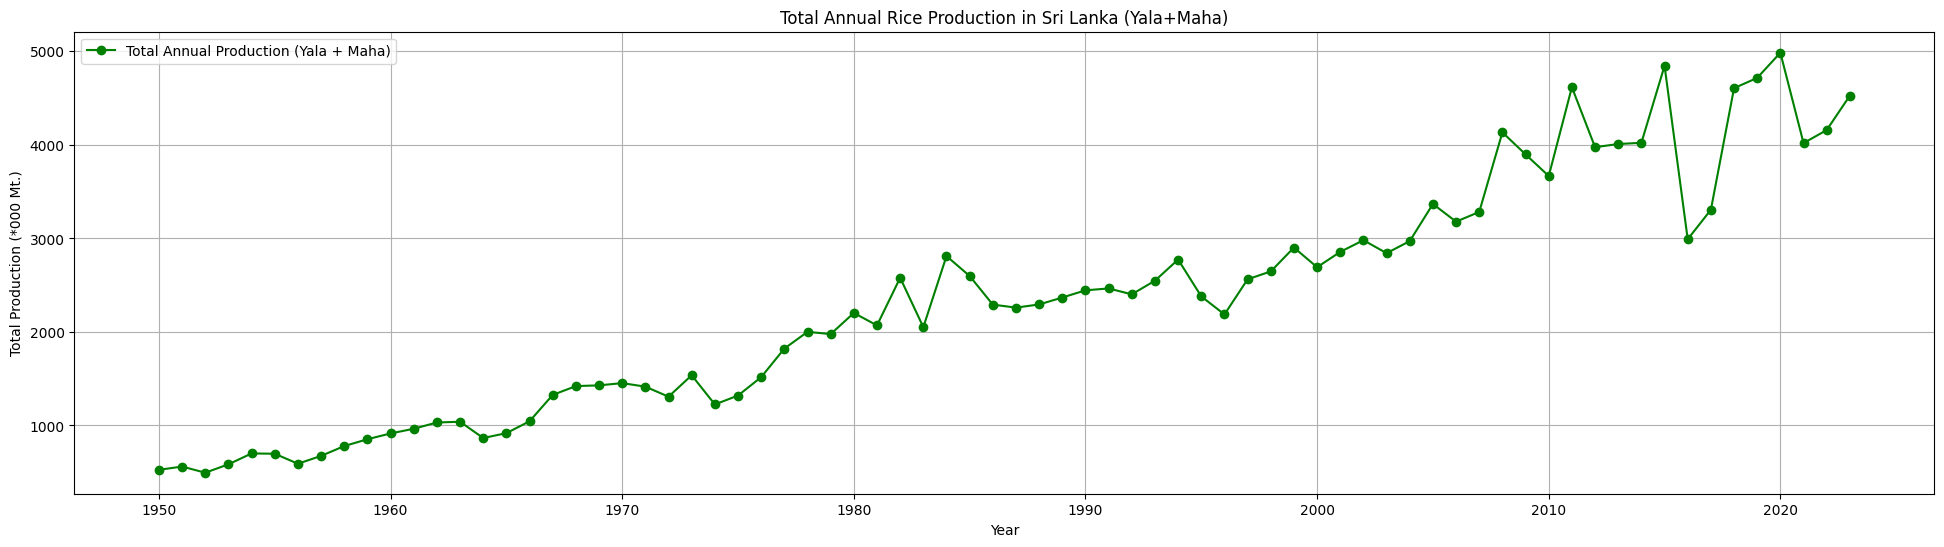

In [76]:
# Pivot table remains the same
seasonal = rice.pivot_table(values='Production (*000  Mt.)', index='Year_New', columns='Season', aggfunc='sum')

# Create a new column for total annual production
seasonal['Total_Production'] = seasonal['Yala'] + seasonal['Maha']

# Plot only the total production
plt.figure(figsize=(24,6))
plt.plot(seasonal.index, seasonal['Total_Production'], label='Total Annual Production (Yala + Maha)', color='green', marker='o')
plt.title('Total Annual Rice Production in Sri Lanka (Yala+Maha)')
plt.xlabel('Year')
plt.ylabel('Total Production (*000 Mt.)')
plt.legend()
plt.grid(True)
plt.show()

### Annual Averages (Yala + Maha): Rainfall, Temperature, Harvested acres, and Production Over Time

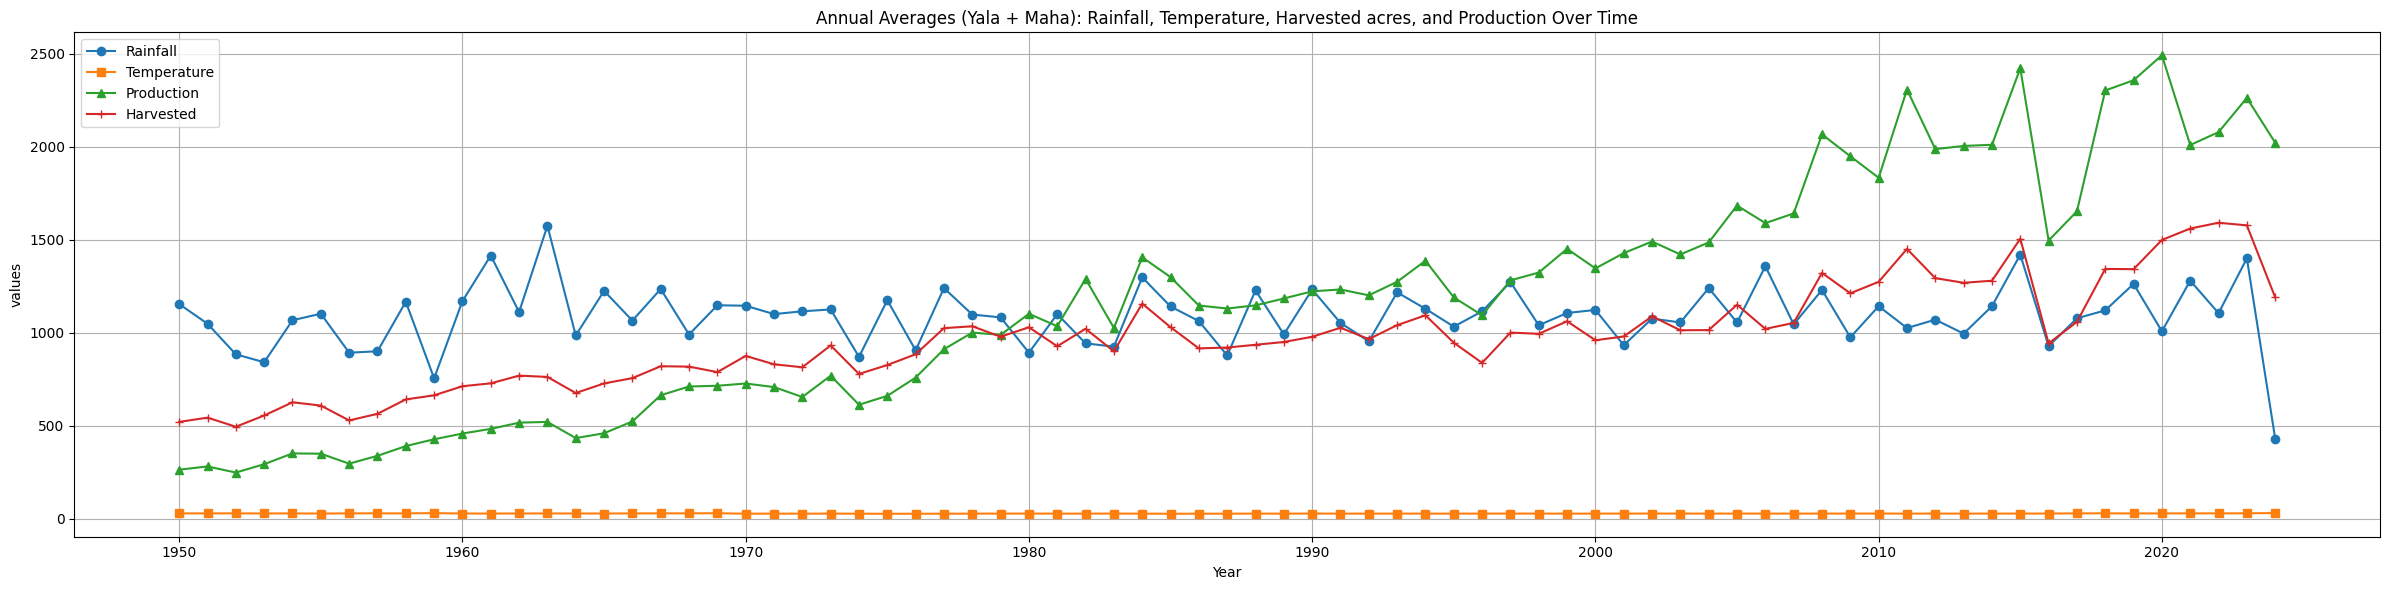

In [77]:
# Group data for all seasons by year and compute mean values
rice = rice.groupby("Year_New")[["Rainfall(mm)", "Temperature(°C)", "Production (*000  Mt.)", 'Harvested (*000  Acres)']].mean().reset_index()


# Plotting
plt.figure(figsize=(24, 6))
plt.plot(rice["Year_New"], rice["Rainfall(mm)"], label="Rainfall", marker='o')
plt.plot(rice["Year_New"], rice["Temperature(°C)"], label="Temperature", marker='s')
plt.plot(rice["Year_New"], rice["Production (*000  Mt.)"], label="Production", marker='^')
plt.plot(rice["Year_New"], rice['Harvested (*000  Acres)'], label="Harvested", marker='+')
plt.title("Annual Averages (Yala + Maha): Rainfall, Temperature, Harvested acres, and Production Over Time")
plt.xlabel("Year")
plt.ylabel("values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Normalize the selected variables

In [78]:
from sklearn.preprocessing import StandardScaler

# Create the scaler
scaler = StandardScaler()

# Select the columns to scale
columns_to_scale = ['Rainfall(mm)','Temperature(°C)', "Production (*000  Mt.)", 'Harvested (*000  Acres)']

# Fit and transform the selected columns
scaled_values = scaler.fit_transform(rice[columns_to_scale])

# Add the scaled columns back to the DataFrame with custom names
rice['Rainfall_scaled'] = scaled_values[:, 0]
rice['Temperature_scaled'] = scaled_values[:, 1]
rice['Production_scaled'] = scaled_values[:, 2]
rice['harvested_scaled']=scaled_values[:, 3]

### Apply log transformation

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Shift scaled values to make them positive
rice['Rainfall_scaled_shifted'] = rice['Rainfall_scaled'] - rice['Rainfall_scaled'].min() + 1
rice['Temperature_scaled_shifted'] = rice['Temperature_scaled'] - rice['Temperature_scaled'].min() + 1
rice['Production_scaled_shifted'] = rice['Production_scaled'] - rice['Production_scaled'].min() + 1
rice['harvested_scaled_shifted'] = rice['harvested_scaled'] - rice['harvested_scaled'].min() + 1

# Apply log transformation
rice['Rainfall_log_scaled'] = np.log(rice['Rainfall_scaled_shifted'])
rice['Temperature_log_scaled'] = np.log(rice['Temperature_scaled_shifted'])
rice['Production_log_scaled'] = np.log(rice['Production_scaled_shifted'])
rice['harvested_log_scaled']=np.log(rice['harvested_scaled_shifted'])

### Line plot of the variables after normalization

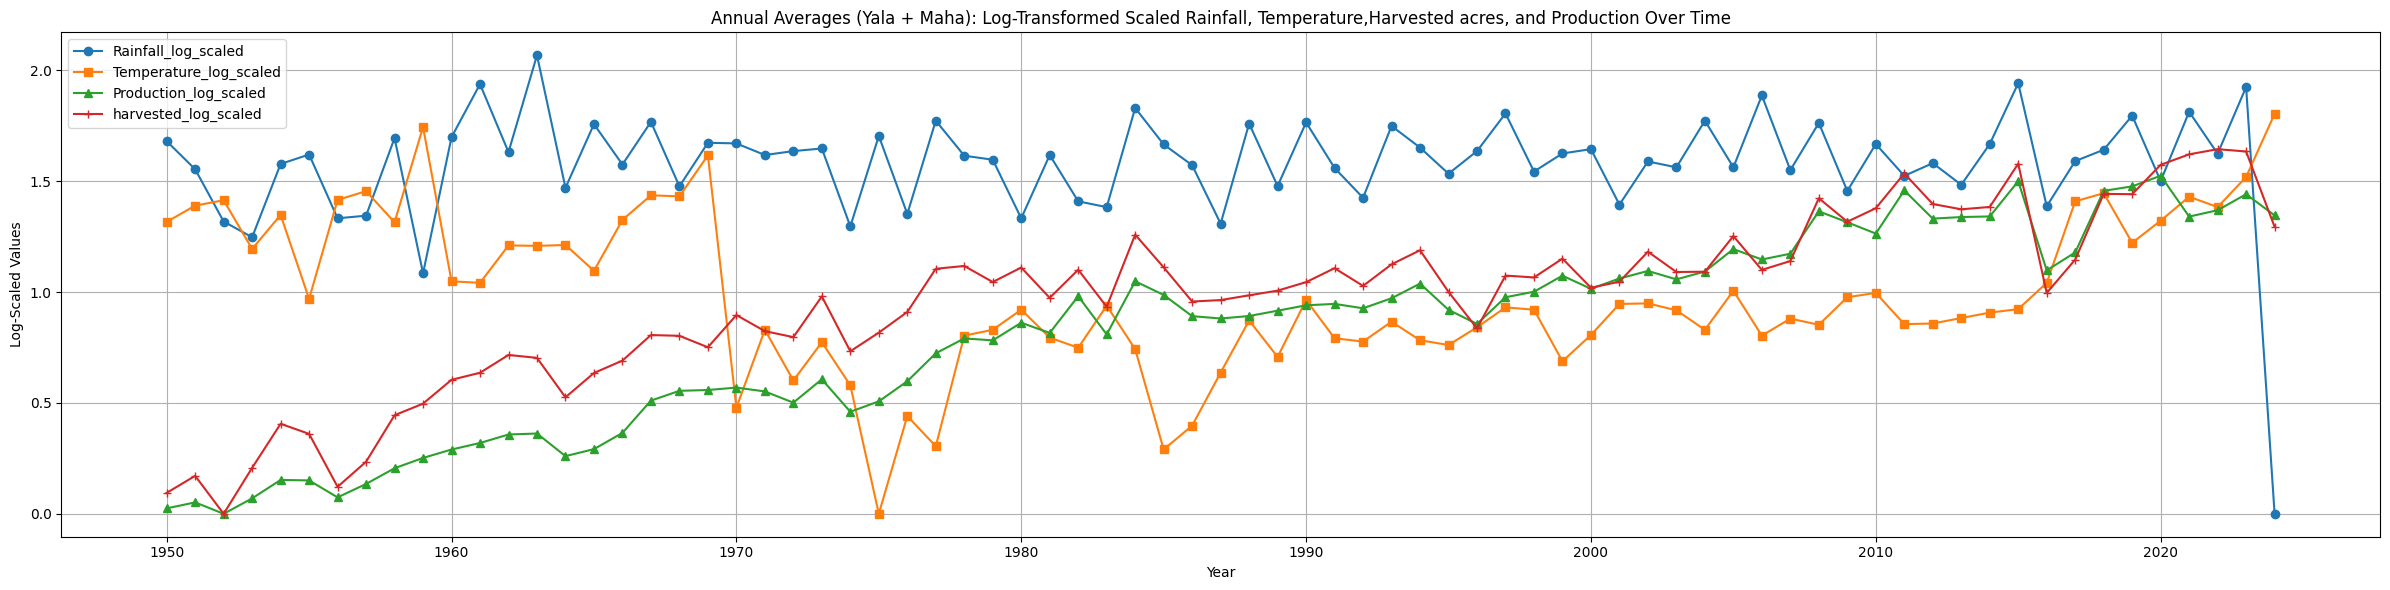

In [80]:
# Group data for all seasons by year and compute mean values
annual_ts = rice.groupby("Year_New")[["Rainfall_log_scaled", "Temperature_log_scaled", "Production_log_scaled", "harvested_log_scaled"]].mean().reset_index()

# Plotting
plt.figure(figsize=(24, 6))
plt.plot(annual_ts["Year_New"], annual_ts["Rainfall_log_scaled"], label="Rainfall_log_scaled", marker='o')
plt.plot(annual_ts["Year_New"], annual_ts["Temperature_log_scaled"], label="Temperature_log_scaled", marker='s')
plt.plot(annual_ts["Year_New"], annual_ts["Production_log_scaled"], label="Production_log_scaled", marker='^')
plt.plot(annual_ts["Year_New"], annual_ts["harvested_log_scaled"], label="harvested_log_scaled", marker='+')
plt.title("Annual Averages (Yala + Maha): Log-Transformed Scaled Rainfall, Temperature,Harvested acres, and Production Over Time")
plt.xlabel("Year")
plt.ylabel("Log-Scaled Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Spearman Correlation Heatmap for the selected variables

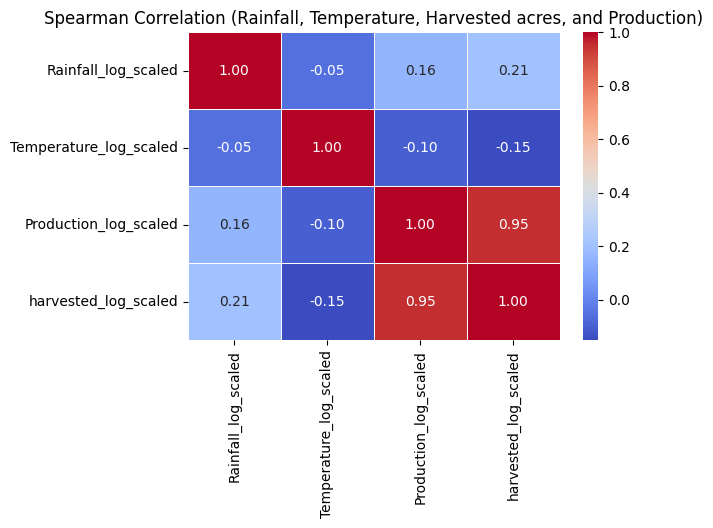

In [81]:
selected = ['Rainfall_log_scaled', 'Temperature_log_scaled', 'Production_log_scaled',"harvested_log_scaled"]
corr_subset = annual_ts[selected].corr(method='spearman')

plt.figure(figsize=(6, 4))
sns.heatmap(corr_subset, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Spearman Correlation (Rainfall, Temperature, Harvested acres, and Production)")
plt.show()

In [82]:
from scipy.stats import spearmanr


# Selected variables
variables = ['Rainfall_log_scaled', 'Temperature_log_scaled', 'Production_log_scaled', 'harvested_log_scaled']

# Apply Spearman's rank correlation test individually for each variable
p_values = {}
for var in variables:
    corr, p_value = spearmanr(annual_ts[var], annual_ts[var])  # Correlation with itself
    p_values[var] = p_value

# Print p-values for each variable
print("Spearman p-values for each variable:\n")
for var in variables:
    print(f"{var}: p-value = {p_values[var]:.4f}")

Spearman p-values for each variable:

Rainfall_log_scaled: p-value = 0.0000
Temperature_log_scaled: p-value = 0.0000
Production_log_scaled: p-value = 0.0000
harvested_log_scaled: p-value = 0.0000


### ACF & PACF plot after log transformation

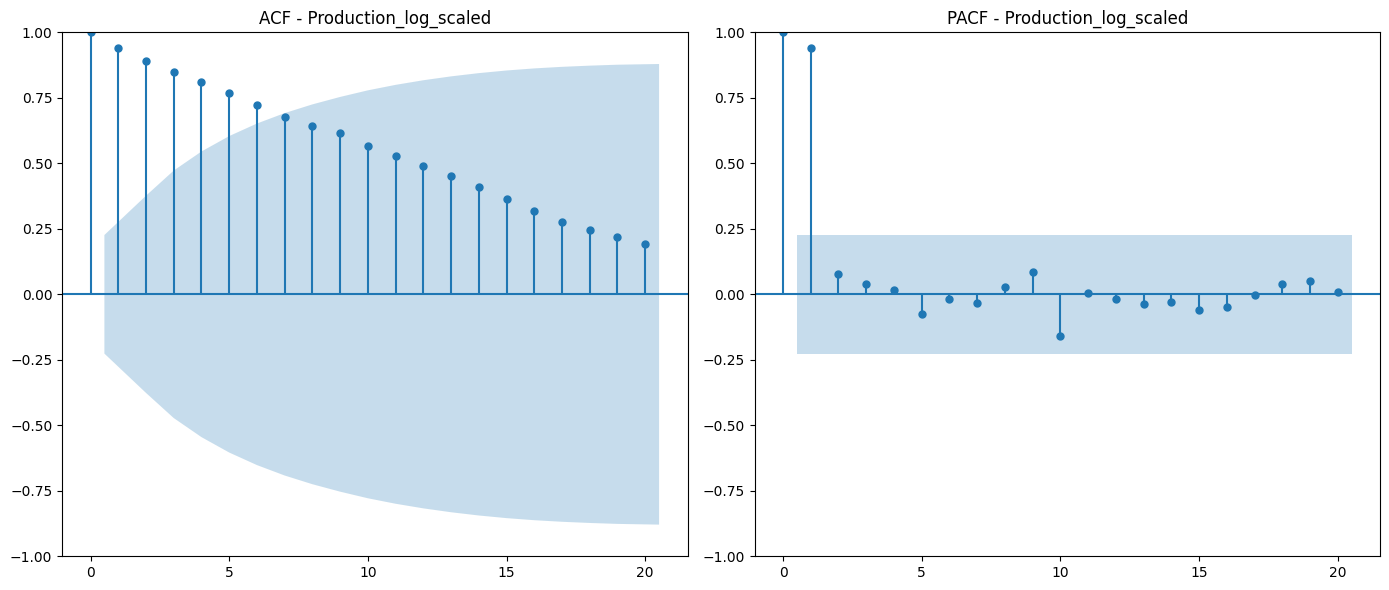

In [83]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Drop NA values if any (e.g., due to differencing)
production_series = annual_ts['Production_log_scaled']

# Plot ACF and PACF
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(production_series, lags=20, ax=plt.gca(), title='ACF - Production_log_scaled')

plt.subplot(1, 2, 2)
plot_pacf(production_series, lags=20, ax=plt.gca(), title='PACF - Production_log_scaled', method='ywm')

plt.tight_layout()
plt.show()

### Check for p-value

In [84]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller test on differenced series
adf_result = adfuller(annual_ts['Production_log_scaled'])

# Output results
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

ADF Statistic: -1.553820924946074
p-value: 0.5067390415578888


### Apply First Differencing for the log transformed production

In [85]:
# First differencing
production_diff= annual_ts['Production_log_scaled'].diff().dropna()

### Stationarity check

In [86]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller test on differenced series
adf_result = adfuller(production_diff)

# Output results
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")

ADF Statistic: -8.989643917715338
p-value: 6.947730210176406e-15
Critical Values:
   1%: -3.524624466842421
   5%: -2.9026070739026064
   10%: -2.5886785262345677


### Differenced Plot of production

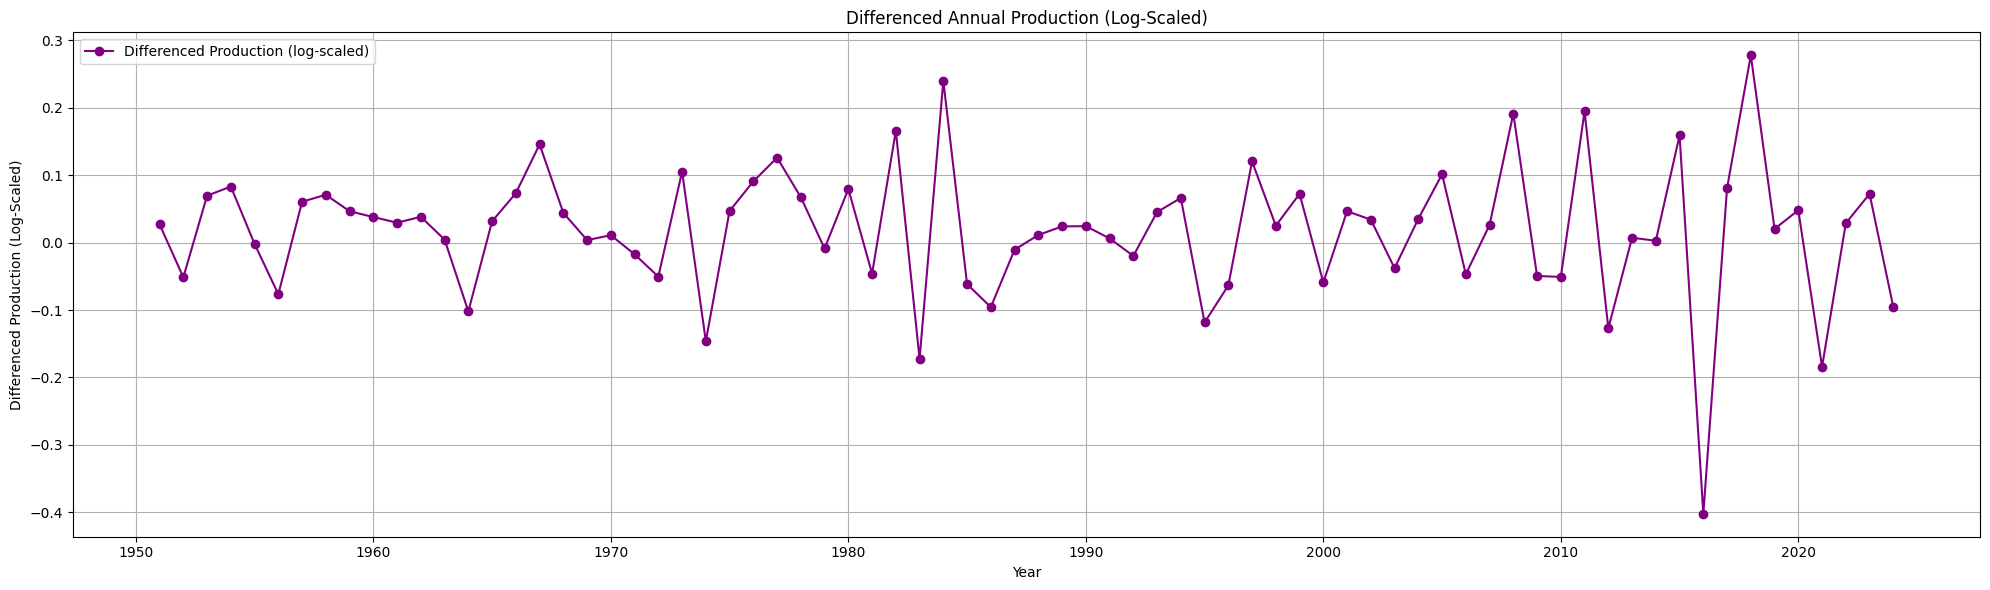

In [87]:
# Plotting the differenced production
plt.figure(figsize=(20, 6))
plt.plot(annual_ts["Year_New"].iloc[1:], production_diff, label="Differenced Production (log-scaled)", marker='o', color='purple')

plt.title("Differenced Annual Production (Log-Scaled)")
plt.xlabel("Year")
plt.ylabel("Differenced Production (Log-Scaled)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### ACF & PACF plots after the first difference

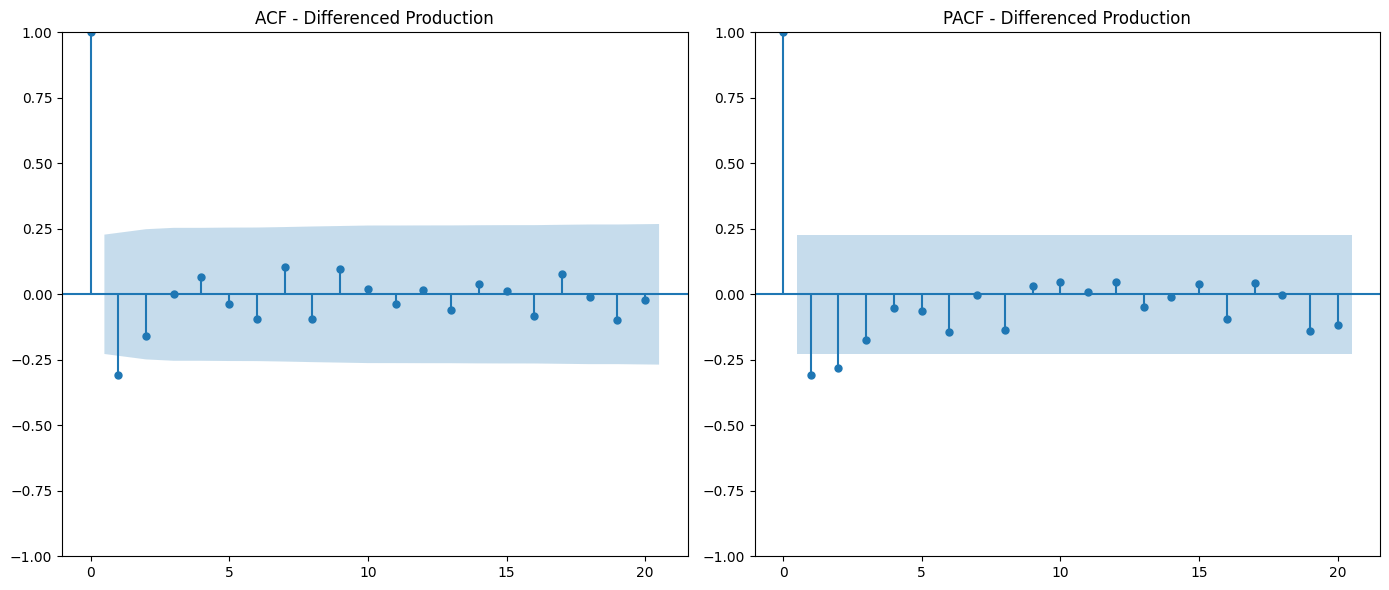

In [88]:
# Plot again to confirm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plot_acf(production_diff, lags=20, ax=plt.gca(), title='ACF - Differenced Production')

plt.subplot(1, 2, 2)
plot_pacf(production_diff, lags=20, ax=plt.gca(), title='PACF - Differenced Production', method='ywm')
plt.tight_layout()
plt.show()

### Apply SARIMAX (1,1,0) (1,1,0,2)

                                     SARIMAX Results                                     
Dep. Variable:             Production_log_scaled   No. Observations:                   75
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 2)   Log Likelihood                 104.937
Date:                           Sat, 31 May 2025   AIC                           -197.874
Time:                                   13:48:37   BIC                           -184.470
Sample:                                        0   HQIC                          -192.556
                                            - 75                                         
Covariance Type:                             opg                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Rainfall_log_scaled       -0.0402      0.023     -1.710      0.087      -0.086       0.006
Tempera

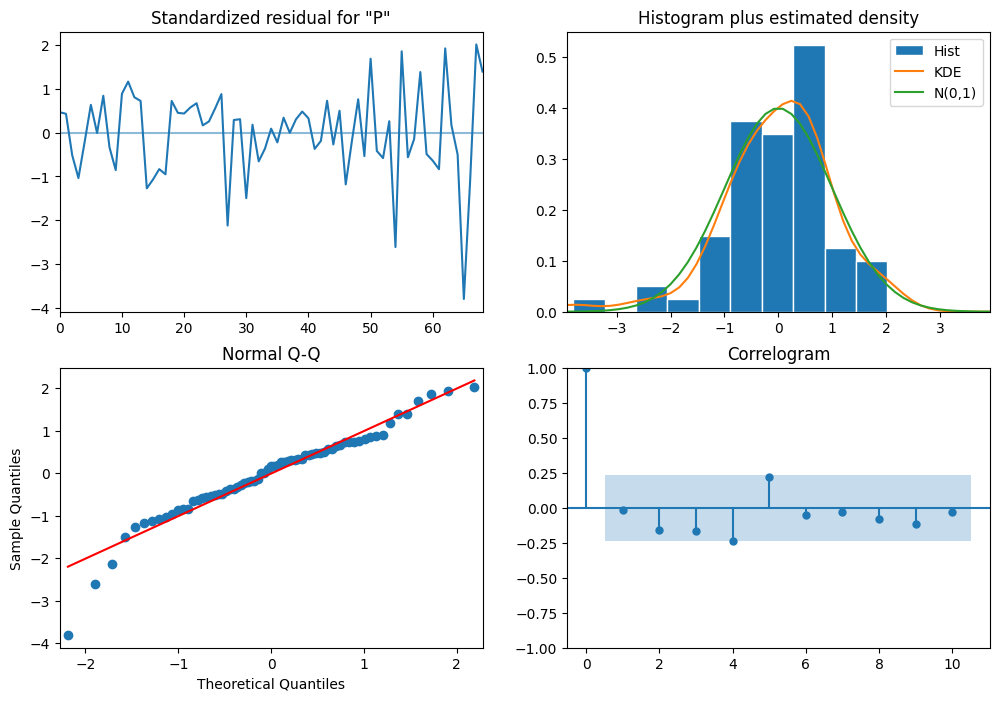

In [89]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Define endogenous and exogenous variables
endog_1 = annual_ts['Production_log_scaled']
exog_1 = annual_ts[['Rainfall_log_scaled', 'Temperature_log_scaled','harvested_log_scaled']]

# Fit SARIMAX model
model = SARIMAX(endog_1,
                exog=exog_1,
                order=(1, 1, 0),  # Non-seasonal (p,d,q)
                seasonal_order=(1, 1, 0, 2),  # Seasonal (P,D,Q,s) with s=2 for Maha/Yala
                enforce_stationarity=False,
                enforce_invertibility=False)

results_1 = model.fit()

# Summary and diagnostics
print(results_1.summary())
results_1.plot_diagnostics(figsize=(12, 8))
plt.show()

In [90]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# In-sample fitted values (log scale)
fitted_values_log = results_1.fittedvalues
actual_log = endog_1

# Transform back to original scale
fitted_values = np.exp(fitted_values_log)
actual = np.exp(actual_log)

# Calculate error metrics on the original scale
mse = mean_squared_error(actual, fitted_values)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(actual, fitted_values) * 100

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")

MSE: 0.0301
RMSE: 0.1734
MAPE: 4.04%


### SARIMAX (1,1,1) (1,1,0,2) by taking rainfall and temeprature as the exogenous variables

                                     SARIMAX Results                                      
Dep. Variable:              Production_log_scaled   No. Observations:                   75
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 2)   Log Likelihood                  61.422
Date:                            Sat, 31 May 2025   AIC                           -110.844
Time:                                    13:48:38   BIC                            -97.439
Sample:                                         0   HQIC                          -105.526
                                             - 75                                         
Covariance Type:                              opg                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Rainfall_log_scaled        0.1274      0.064      1.983      0.047       0.001       0.253

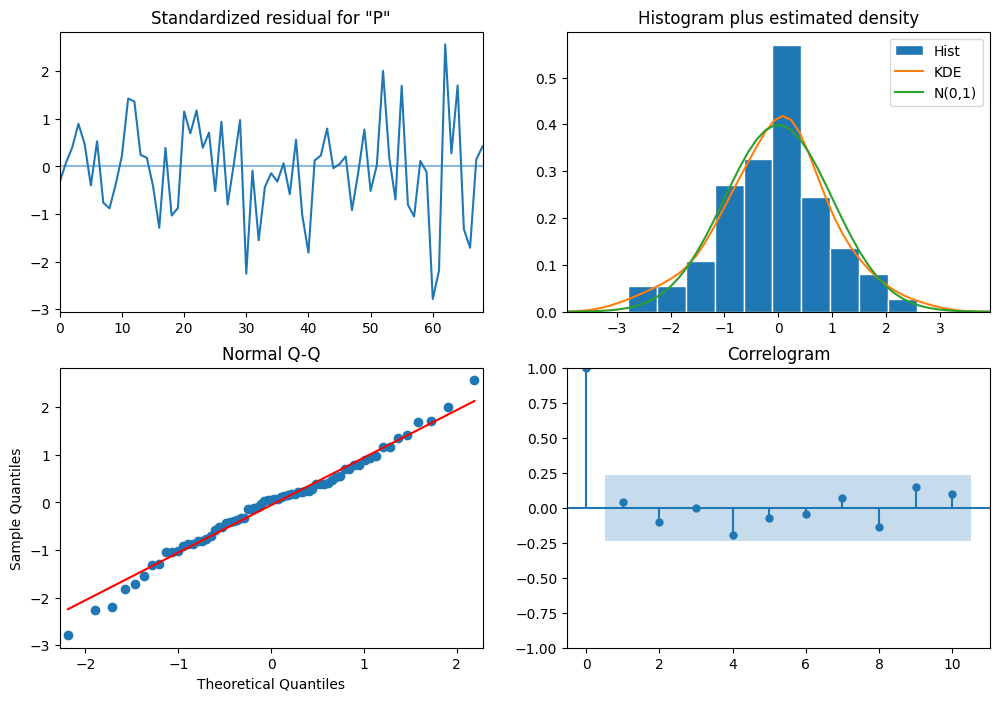

In [91]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Define endogenous and exogenous variables
endog_2 = annual_ts['Production_log_scaled']
exog_2 = annual_ts[['Rainfall_log_scaled', 'Temperature_log_scaled']]

# Fit SARIMAX model
model = SARIMAX(endog_2,
                exog=exog_2,
                order=(1, 1, 1),  # Non-seasonal (p,d,q)
                seasonal_order=(1, 1, 0, 2),  # Seasonal (P,D,Q,s) with s=2 for Maha/Yala
                enforce_stationarity=False,
                enforce_invertibility=False)

results_2 = model.fit()

# Summary and diagnostics
print(results_2.summary())
results_2.plot_diagnostics(figsize=(12, 8))
plt.show()

In [92]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Get predicted values (in-sample fitted values)
fitted_values = results_2.fittedvalues

# Ensure the length of actual and predicted match (they should both be 'endog_clean')
actual = endog_2

# Calculate metrics
mse = mean_squared_error(actual, fitted_values)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(actual, fitted_values)*100

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")

MSE: 0.0100
RMSE: 0.1000
MAPE: 561321285533915.31%


### SARIMAX (0,1,1) (0,1,1,2) by taking temperature as the only exogenous variable

                                     SARIMAX Results                                     
Dep. Variable:             Production_log_scaled   No. Observations:                   75
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 2)   Log Likelihood                  62.239
Date:                           Sat, 31 May 2025   AIC                           -116.479
Time:                                   13:48:39   BIC                           -107.601
Sample:                                        0   HQIC                          -112.961
                                            - 75                                         
Covariance Type:                             opg                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Temperature_log_scaled    -0.0016      0.063     -0.026      0.979      -0.125       0.122
ma.L1  

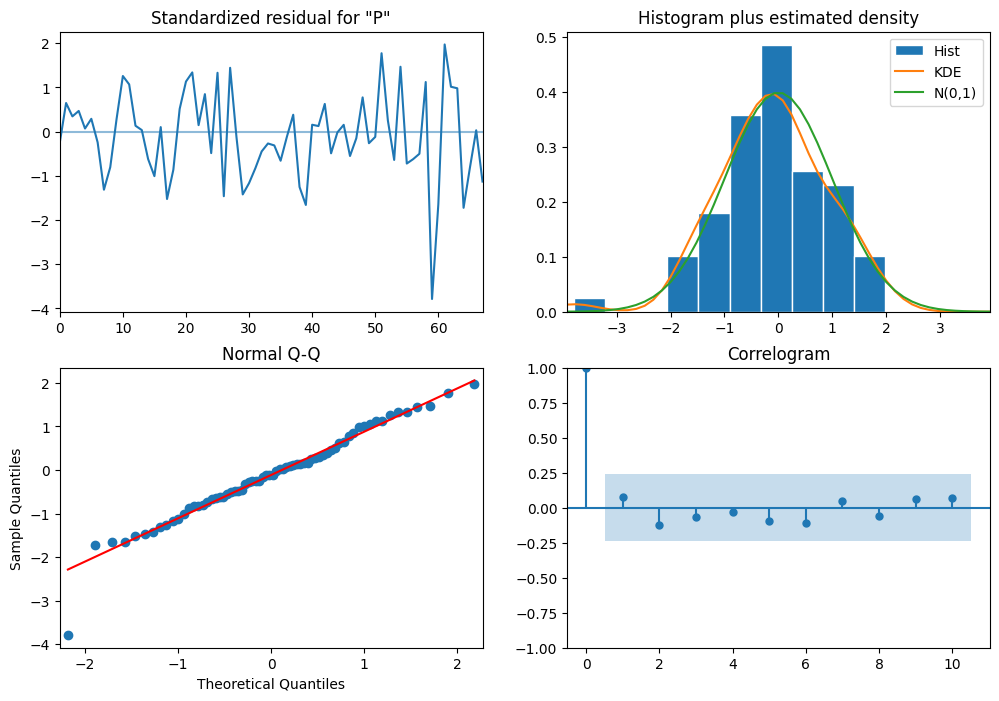

In [93]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Define endogenous and exogenous variables
endog_3 = annual_ts['Production_log_scaled']
exog_3 = annual_ts[['Temperature_log_scaled']]

# Fit SARIMAX model
model = SARIMAX(endog_3,
                exog=exog_3,
                order=(0, 1, 1),  # Non-seasonal (p,d,q)
                seasonal_order=(0, 1, 1, 2),  # Seasonal (P,D,Q,s) with s=2 for Maha/Yala
                enforce_stationarity=False,
                enforce_invertibility=False)

results_3 = model.fit()

# Summary and diagnostics
print(results_3.summary())
results_3.plot_diagnostics(figsize=(12, 8))
plt.show()

In [94]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Get predicted values (in-sample fitted values)
fitted_values = results_3.fittedvalues

# Ensure the length of actual and predicted match (they should both be 'endog_clean')
actual = endog_3

# Calculate metrics
mse = mean_squared_error(actual, fitted_values)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(actual, fitted_values)*100

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")

MSE: 0.0088
RMSE: 0.0938
MAPE: 415745164839520.50%
